In [1]:
from pylabel import importer

dataset = importer.ImportYoloV5WithYaml(
    yaml_file="RiceDiseaseDataset_yolo/rice_detection.yaml",
    image_ext="jpg,jpeg,png,JPG,PNG",
    name_of_annotations_folder="labels",
    path_to_annotations=None,
)


/home/dnth/anaconda3/envs/paddy/lib/python3.8/site-packages/pylabel/importer.py:566: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset.df = dataset.df.append(dataset2.df)
/home/dnth/anaconda3/envs/paddy/lib/python3.8/site-packages/pylabel/importer.py:566: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset.df = dataset.df.append(dataset2.df)


In [2]:
dataset.df.head(5)


,img_folder,img_filename,img_path,img_id,img_width,img_height,img_depth,ann_segmented,ann_bbox_xmin,ann_bbox_ymin,...,ann_segmentation,ann_iscrowd,ann_pose,ann_truncated,ann_difficult,cat_id,cat_name,cat_supercategory,split,annotated
id,,,,,,,,,,,,,,,,,,,,,
0,../../images/train,img_blb_85.jpg,NaN,0,768,512,3,NaN,49.0,176.0,...,NaN,NaN,NaN,NaN,NaN,2,Bacterial_Blight,NaN,train,1
1,../../images/train,img_blb_85.jpg,NaN,0,768,512,3,NaN,71.0,295.0,...,NaN,NaN,NaN,NaN,NaN,2,Bacterial_Blight,NaN,train,1
2,../../images/train,img_brown_19.jpeg,NaN,1,264,191,3,NaN,30.0,13.0,...,NaN,NaN,NaN,NaN,NaN,0,Brown_Spot,NaN,train,1
3,../../images/train,img_brown_19.jpeg,NaN,1,264,191,3,NaN,22.0,33.0,...,NaN,NaN,NaN,NaN,NaN,0,Brown_Spot,NaN,train,1
4,../../images/train,img_blb_151.jpeg,NaN,2,224,224,3,NaN,31.0,110.0,...,NaN,NaN,NaN,NaN,NaN,2,Bacterial_Blight,NaN,train,1


In [3]:
print(f"Number of images: {dataset.analyze.num_images}")
print(f"Number of classes: {dataset.analyze.num_classes}")
print(f"Classes:{dataset.analyze.classes}")
print(f"Class counts:\n{dataset.analyze.class_counts}")

Number of images: 743
Number of classes: 3
Classes:['Brown_Spot', 'Rice_Blast', 'Bacterial_Blight']
Class counts:
Brown_Spot          1878
Rice_Blast           869
Bacterial_Blight     434
Name: cat_name, dtype: int64


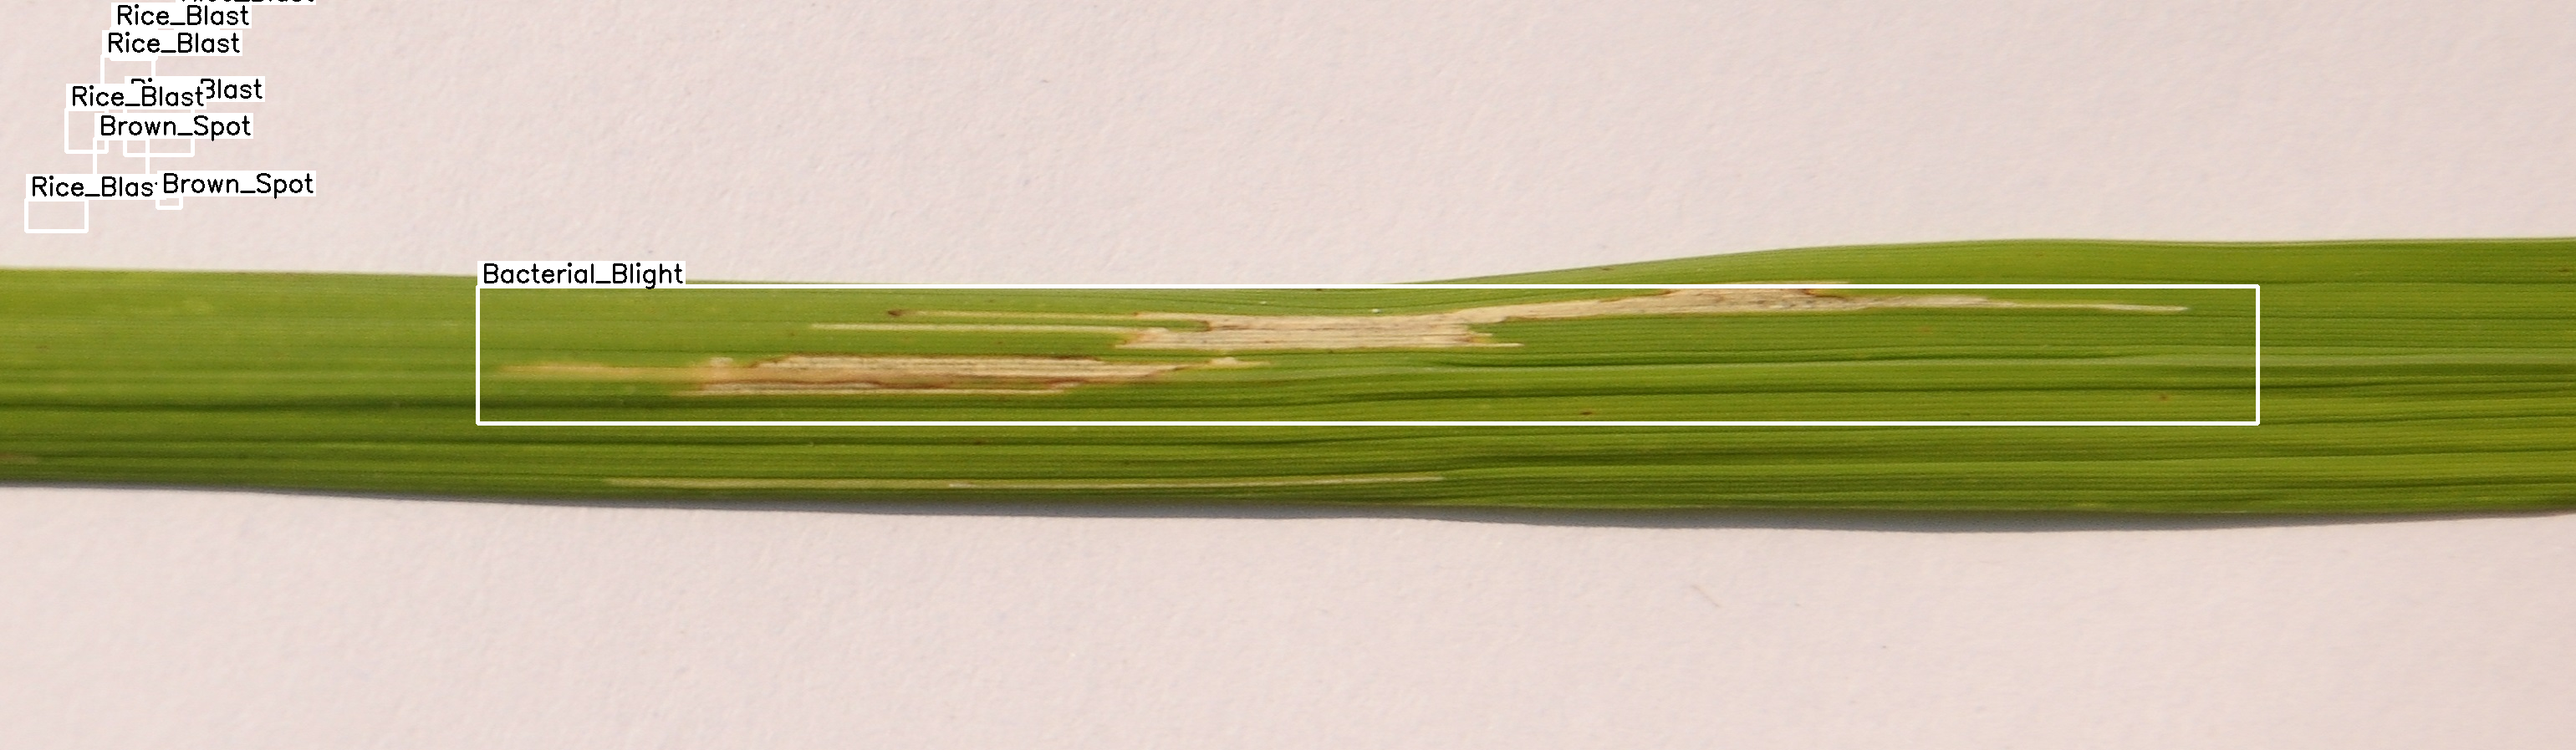

In [5]:
from IPython.display import Image, display
display(dataset.visualize.ShowBoundingBoxes(100))

In [ ]:
from pathlib import Path
import os
output_path = str(Path(dataset.path_to_annotations, "../", "voc_annotations/"))

Path(output_path).mkdir(exist_ok=True)
dataset.export.ExportToVoc(output_path=output_path)[0]